In [1]:
#import library
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dense, Dropout,Flatten,Input,Conv2D,BatchNormalization,GlobalAvgPool2D,MaxPooling2D

In [2]:
#load_data

fm=keras.datasets.fashion_mnist
(train_images, train_labels), (test_images,test_labels) = fm.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


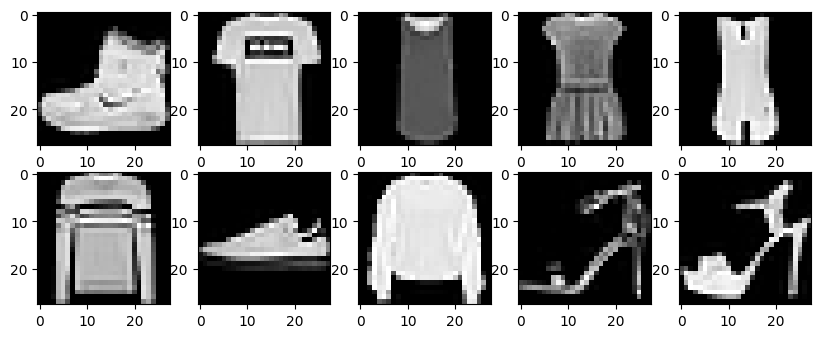

In [3]:
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(5, 5, i + 1)
    plt.imshow(train_images[i], cmap='gray')
plt.show()

In [4]:
#normalize
x_train = train_images.reshape((60000,28,28,1)).astype('float32') / 255.0
x_test = test_images.reshape((10000,28,28,1)).astype('float32') / 255.0

print (x_train.shape)
print (x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [5]:
model=Sequential([
    #Input(shape=(28,28)),

    Conv2D(32, (3, 3), activation='relu'),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    #layers.Flatten(),
    GlobalAvgPool2D(),

    Dropout(0.5),

    Dense(64, activation='relu'),
    Dropout(0.5),

    Dense(10,activation='softmax')])

In [6]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [7]:
model.fit(x_train, train_labels,epochs=30,batch_size=64,validation_split=0.1)

Epoch 1/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.4950 - loss: 1.3415 - val_accuracy: 0.7905 - val_loss: 0.5340
Epoch 2/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7507 - loss: 0.6624 - val_accuracy: 0.8262 - val_loss: 0.4495
Epoch 3/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7981 - loss: 0.5567 - val_accuracy: 0.8575 - val_loss: 0.3862
Epoch 4/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8280 - loss: 0.4863 - val_accuracy: 0.8700 - val_loss: 0.3551
Epoch 5/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8402 - loss: 0.4486 - val_accuracy: 0.8795 - val_loss: 0.3343
Epoch 6/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8537 - loss: 0.4171 - val_accuracy: 0.8890 - val_loss: 0.3251
Epoch 7/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8641 - loss: 0.3980 - val_accuracy: 0.8892 - val_loss: 0.3049
Epoch 8/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8704 - loss: 0.3728 - val_accuracy: 0

In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 10, 10, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 8, 8, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 2, 2, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 64)                  │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 320,192 (1.22 MB)

 Trainable params: 106,730 (416.91 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 213,462 (833.84 KB)

In [9]:
print(model.evaluate(x_test,test_labels,verbose=2))

313/313 - 2s - 6ms/step - accuracy: 0.9112 - loss: 0.2859
[0.28591009974479675, 0.9111999869346619]


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Confusion matrix, without normalization
[[230  20  39  33 114  86 328   0 122  28]
 [  1 979   1   1   8   1   2   1   3   3]
 [ 12  40 286   3 436   0 184   0  26  13]
 [ 17  65   9 403 171  28  63   4  75 165]
 [  0   4   4  10 925   2  24   1  16  14]
 [ 15   0   5   3   1 440   0  44 406  86]
 [ 22  13  21  15 486  18 324   2  72  27]
 [ 25   1   2   6   0 211   5 389 333  28]
 [ 25   3  13   1  33   6  31   2 862  24]
 [  5   1   3   1   6  42   4  34  51 853]]


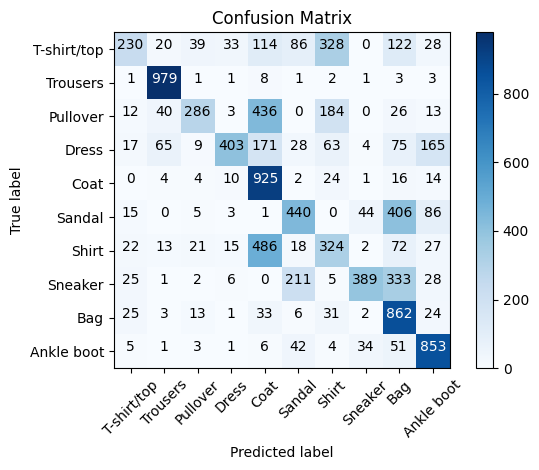

In [10]:
from sklearn.metrics import confusion_matrix
import itertools

predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)

# رسم ماتریس سردرگمی
conf_mtx = confusion_matrix(test_labels, predicted_classes)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.tight_layout()

# تعریف کلاس‌ها
class_names = ['T-shirt/top', 'Trousers', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure()
plot_confusion_matrix(conf_mtx, classes=class_names, title='Confusion Matrix')

plt.show()